# Tools to compare outputs among models
Last modification: 2024.04.09.</br>
Update note: Make things compact

# Plot summary

In [ ]:
from perturb_plots import plot_summary
import matplotlib.pylab as plt

law = 'aging'
ax = plot_summary(law=law)
plt.tight_layout()
plt.savefig('/export/dump/jyun/perturb_stress/%slaw_summary.png'%(law),dpi=300)
plt.show()

# Routined

In [4]:
30*24*365

262800

----------------- Load outputs -----------------
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsdynX10_340/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsdynX10_340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsdynX10_340/const_params.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vsdynX10_340/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vsdynX10_340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vsdynX10_340/const_params.npy
Load saved data: /export/dump/jyun/perturb_stress/reference/short_outputs_0
Load saved data: /export/dump/jyun/perturb_stress/reference/outputs_depthinfo
Load saved data: /export/dump/jyun/perturb_stress/reference/const_params.npy
----------------- Load events -----------------
Load saved data: /export/dump/jyun/perturb_stress/reference/cumslip_outputs_Vths_2e-01_srvar_010_rths_10_tcreep_2_tseis_05.npy
Load saved 

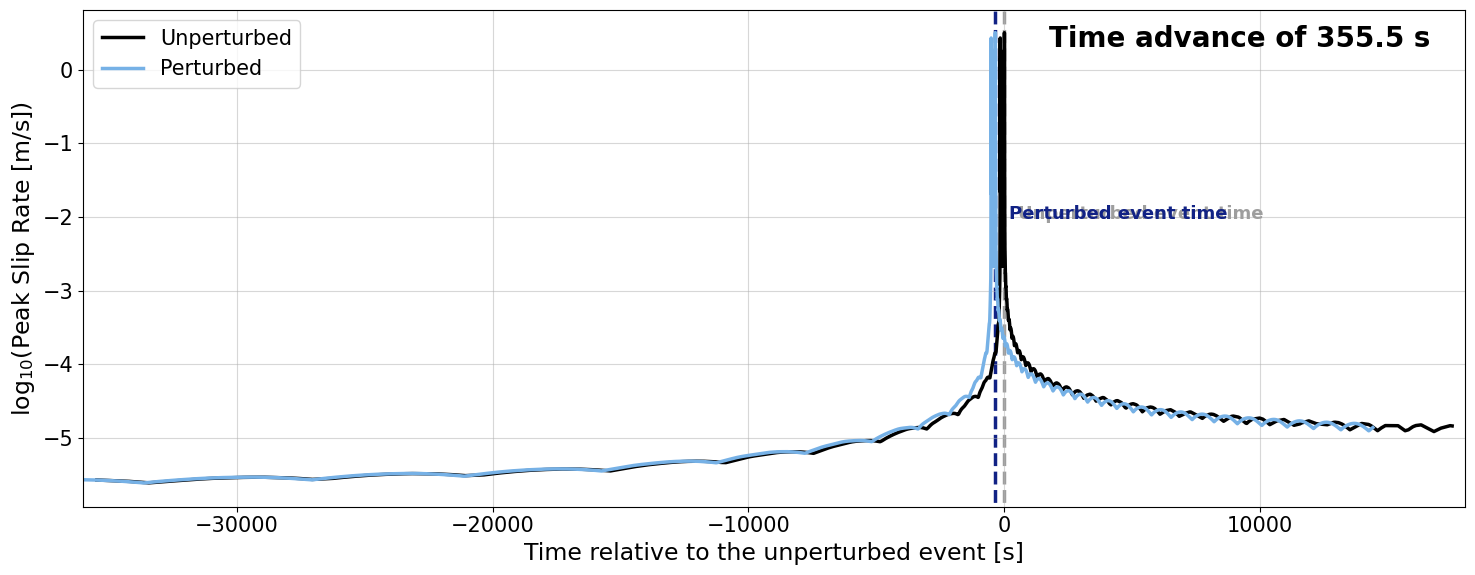

In [1]:
from perturb_tools import ROUTINE_PERTURB
import matplotlib.pylab as plt
plt.rcParams['font.size'] = '15'

# routine = ROUTINE_PERTURB('pert18_vsdyn_340','lowres_spinup_aginglaw_reference')
# routine = ROUTINE_PERTURB('pert18_vs340','lowres_spinup_aginglaw_reference')
# routine = ROUTINE_PERTURB('pert31_vsdyn_340','stress_dep')
routine = ROUTINE_PERTURB('pert8_vs340_87600h')

fig,ax = plt.subplots(figsize=(15,6))
ax,lag = routine.pub_plot_triggering_response(ax)
# ax,lag = routine.plot_triggering_response(ax)
# ax = routine.plot_compare_with_input_dCFS(ax,dt=0.01)
plt.tight_layout()
plt.show()


In [ ]:
print('%1.15e'%(routine.ref.tstart[282]))
print('%1.15e'%(routine.after_pert.tstart[routine.after_pert.system_wide]))

# Initiate

In [1]:
import numpy as np
from perturb_tools import PERTURB
from perturb_plots import *
import matplotlib.pylab as plt
import myplots
mp = myplots.Figpref()
plt.rcParams['font.size'] = '15'

ref = PERTURB('reference')
ref.load_output(short_idx=0)
ref.load_events(compute_on=False)
ref.print_event_details(target_eventid=8)

# pert = PERTURB('pert31_vsdyn_340')
# pert.load_output()
# pert.load_events(compute_on=True,save_on=False)
# pert.print_event_details()

after_pert = PERTURB('after_pert8_vs340_262800h')
after_pert.load_output()
after_pert.load_events(compute_on=True,save_on=False)
after_pert.print_event_details()


Load saved data: /export/dump/jyun/perturb_stress/reference/short_outputs_0
Load saved data: /export/dump/jyun/perturb_stress/reference/outputs_depthinfo
Load saved data: /export/dump/jyun/perturb_stress/reference/const_params.npy
Load saved data: /export/dump/jyun/perturb_stress/reference/cumslip_outputs_Vths_2e-01_srvar_010_rths_10_tcreep_2_tseis_05.npy
Load saved data: /export/dump/jyun/perturb_stress/reference/spin_up_idx_Vths_2e-01_srvar_010_rths_10_tcreep_2_tseis_05.npy
======== Event details without perturbation ========
Event 88
Event depth without perturbation: 4.38
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vs340_262800h/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vs340_262800h/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert8_vs340_262800h/const_params.npy
Compute event details
Compute cumulative slip vs. depth >>> No cutting
Slip rate > 2e-01
All safe from the SR variation criterion
Remove si

(81519,) (858, 81519) (858, 81519)
(29839,) (858, 29839) (858, 29839)


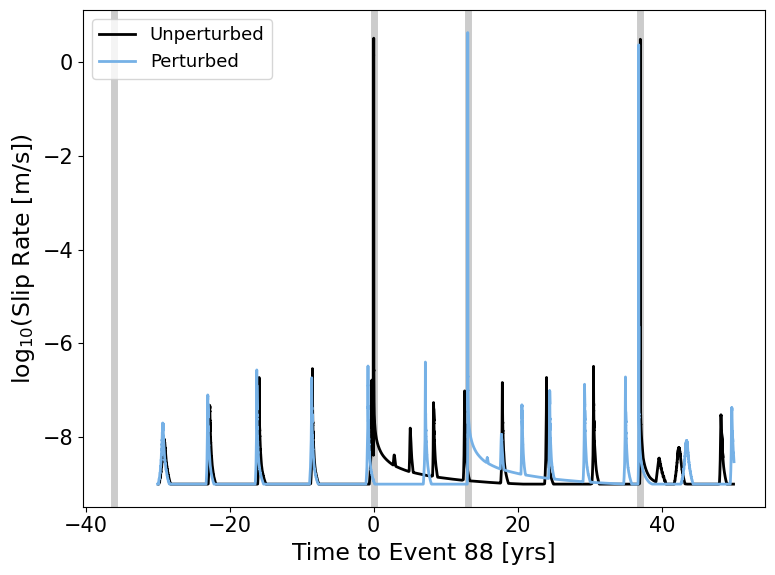

In [7]:
def get_var(model,ref=False,trange=None):
    t = model.variables['time'].data[1:]
    # V = model.variables['sliprate'].data
    V = np.log10(abs(model.variables['sliprate'].data))
    tau = abs(model.variables['shearT'].data)
    if ref:
        ti = np.where(np.logical_and(t>=trange[0],t<=trange[1]))[0]
        t = t[ti]
        V = V[:,ti]
        tau = tau[:,ti]
    print(t.shape,V.shape,tau.shape)
    return t,V,tau

after_pert_t,after_pert_V,after_pert_tau = get_var(after_pert)
ref_t,ref_V,ref_tau = get_var(ref,ref=True,trange=[after_pert_t[0],after_pert_t[-1]])

yr2sec = 3600*24*365
fig,ax=plt.subplots(figsize=(8,6))
ax.plot((ref_t-ref.tstart[88])/yr2sec,np.max(ref_V,axis=0),'k',lw=2,label='Unperturbed',zorder=3)
ax.plot((after_pert_t-ref.tstart[88])/yr2sec,np.max(after_pert_V,axis=0),color=mp.myblue,lw=2,label='Perturbed',zorder=3)
yl = ax.get_ylim()
ax.vlines((ref.tstart[82]-ref.tstart[88])/yr2sec,yl[0],yl[1],color='0.8',lw=5)
# ax.vlines((ref.tstart[83]-ref.tstart[88])/yr2sec,yl[0],yl[1],color='0.8',lw=5)
ax.vlines((ref.tstart[88]-ref.tstart[88])/yr2sec,yl[0],yl[1],color='0.8',lw=5)
ax.vlines((ref.tstart[89]-ref.tstart[88])/yr2sec,yl[0],yl[1],color='0.8',lw=5)
ax.vlines((after_pert.tstart[after_pert.system_wide]-ref.tstart[88])/yr2sec,yl[0],yl[1],color='0.8',lw=5)
ax.legend(fontsize=13)
ax.set_xlabel('Time to Event 88 [yrs]',fontsize=17)
ax.set_ylabel('log$_{10}$(Slip Rate [m/s])',fontsize=17)
# plt.xlim([2.71209e10,2.71211e10])
plt.ylim(yl)
plt.tight_layout()
plt.show()

In [6]:
(after_pert.tstart[after_pert.system_wide]-ref.tstart[88])/yr2sec

array([13.04750865])

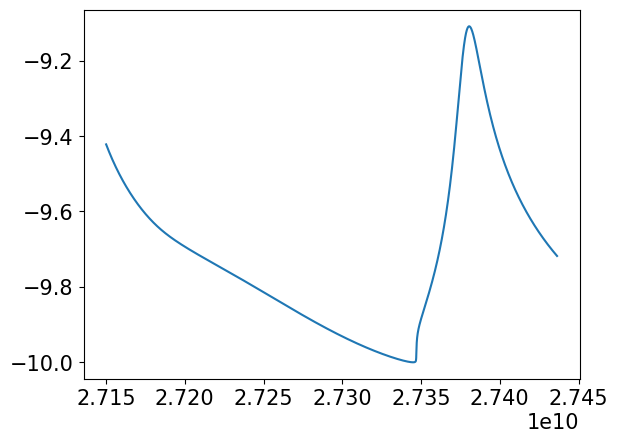

In [28]:
def read_faultoutput(pathname,csv_fname):
    outputs = pd.read_csv('/export/dump/jyun/perturb_stress/%s/%s'%(pathname,csv_fname),delimiter=',',skiprows=1).values
    t = outputs[1:,0]
    shearT = abs(outputs[1:,3])
    sr = np.log10(abs(outputs[1:,4]))
    normalT = outputs[1:,5]
    f = np.divide(shearT,normalT)
    state = outputs[1:,1]
    return t,f,sr,state


t,f,sr,state = read_faultoutput('outputs_continue_after_pert8_vs340_262800h','faultp_fp611.csv')
plt.figure()
plt.plot(t,sr)
plt.show()


In [29]:
# (2.714983357191501617e+10-ref.tstart[88])/3600/24
print('%1.15e'%(ref.tstart[88]+3600*24*365*50))

2.869780394139096e+10


In [2]:
import numpy as np
from perturb_tools import PERTURB
from perturb_plots import *
import matplotlib.pylab as plt
import myplots
mp = myplots.Figpref()
plt.rcParams['font.size'] = '15'

model1 = PERTURB('pert18_vs340_lowres_spinup_aginglaw_reference')
model1.load_output()
model2 = PERTURB('pert8_vs340')
model2.load_output()

print(np.all(np.argsort(abs(model1.dep)) == np.arange(len(model1.dep))))
print(np.all(np.argsort(abs(model2.dep)) == np.arange(len(model2.dep))))

Load saved data: /export/dump/jyun/perturb_stress/pert18_vs340_lowres_spinup_aginglaw_reference/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/pert18_vs340_lowres_spinup_aginglaw_reference/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/pert18_vs340_lowres_spinup_aginglaw_reference/const_params.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vs340/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vs340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vs340/const_params.npy
True
True


In [ ]:
import numpy as np
from perturb_tools import PERTURB
from perturb_plots import *
import matplotlib.pylab as plt
import myplots
mp = myplots.Figpref()
plt.rcParams['font.size'] = '15'

model1 = PERTURB('after_pert31_vsstatic_340')
model1.load_output()
model1.load_events(compute_on=True,save_on=False)
model1.print_event_details()

print(np.all(np.argsort(abs(model1.dep)) == np.arange(len(model1.dep))))

In [ ]:
model1.tstart[model1.system_wide]

In [ ]:
from scipy import interpolate
b = 0.019
V0 = 1e-6

y,a_b = np.loadtxt('perturb_stress/fractal_ab_02',unpack=True)
f = interpolate.interp1d(y,a_b)
a = f(model1.dep) + b

V = model1.variables['sliprate'].data
psi = model1.variables['state'].data[:,1:]
sigma = model1.variables['normalT'].data[:,1:]

print(V.shape,psi.shape,sigma.shape,a.shape)

F = np.array([a*np.arcsinh((abs(V[:,k])/(2*V0))*np.exp(psi[:,k]/a)) for k in range(psi.shape[1])]).T
print(F.shape,np.max(F),np.min(F))
strength = np.multiply(F,sigma)
strength = np.array([strength[:,k] - strength[:,0] for k in range(strength.shape[1])]).T
print(strength.shape,np.max(strength),np.min(strength))

In [ ]:
xax = np.arange(strength.shape[1])
X,Y = np.meshgrid(xax,np.sort(abs(model1.dep)))
vmin,vmax = -20,20

import cmcrameri.cm as cram
import matplotlib as mpl
from faultoutputs_image import get_continuous_cmap
cm = cram.vik
col_list = [cm(i) for i in np.linspace(0,1,6)]
col_list.insert(3,mpl.colors.to_rgb('w'))
float_list = [mpl.colors.Normalize(vmin,vmax)(i) for i in np.linspace(vmin,0,4)]
[float_list.append(mpl.colors.Normalize(vmin,vmax)(k)) for k in np.linspace(0,vmax,4)[1:]]
cmap_n = get_continuous_cmap(col_list,input_hex=False,float_list=float_list)

In [ ]:
plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(20.6,11))
cb = plt.pcolormesh(X,Y,strength,cmap=cmap_n,vmin=vmin,vmax=vmax)
plt.xlabel('Timesteps',fontsize=30)
plt.ylim(0,24)
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.colorbar(cb,extend='both').set_label('Strength Change [MPa]',fontsize=30,rotation=270,labelpad=30) # vertical colorbar
plt.tight_layout()
plt.show()

In [ ]:
def get_strength(model,ref=False,trange=None):
    from scipy import interpolate
    b = 0.019
    V0 = 1e-6

    y,a_b = np.loadtxt('perturb_stress/fractal_ab_02',unpack=True)
    f = interpolate.interp1d(y,a_b)
    a = f(model.dep) + b

    t = model.variables['time'].data[1:]
    V = model.variables['sliprate'].data
    psi = model.variables['state'].data[:,1:]
    sigma = model.variables['normalT'].data[:,1:]
    tau = abs(model.variables['shearT'].data[:,1:])
    if ref:
        ti = np.where(np.logical_and(t>=trange[0],t<=trange[1]))[0]
        t = t[ti]
        V = V[:,ti]
        psi = psi[:,ti]
        sigma = sigma[:,ti]
        tau = tau[:,ti]

    print(V.shape,psi.shape,sigma.shape,a.shape,t.shape)

    F = np.array([a*np.arcsinh((abs(V[:,k])/(2*V0))*np.exp(psi[:,k]/a)) for k in range(psi.shape[1])]).T
    # print(F.shape,np.max(F),np.min(F))
    strength = np.multiply(F,sigma)
    # strength = np.array([strength[:,k] - strength[:,0] for k in range(strength.shape[1])]).T
    # print(strength.shape,np.max(strength),np.min(strength))
    return strength,t,tau

In [ ]:
after_pert_str,after_pert_t,after_pert_tau = get_strength(after_pert)
ref_str,ref_t,ref_tau = get_strength(ref,ref=True,trange=[after_pert_t[0],after_pert_t[-1]])
lead_fs_idx = ref.lead_fs[np.where(ref.system_wide == ref.idx)[0][0]]
target_dep = ref.evdep[lead_fs_idx]
# target_dep = ref.evdep[ref.idx]
di = np.argmin(abs(abs(ref.dep)-abs(target_dep)))

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(ref_t,ref_str[di,:],'k',lw=2,label='Unperturbed')
ax.plot(after_pert_t,after_pert_str[di,:],color=mp.myblue,lw=2,label='Perturbed',linestyle='--')
ax.legend(fontsize=13)
ax.set_xlabel('Time [s]',fontsize=17)
ax.set_ylabel('Strength ($\sigma_nF$) [MPa]',fontsize=17)
ax.set_title('%1.2f km Depth'%(target_dep),fontsize=17,fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(ref_t,ref_str[di,:],'k',lw=2,label='$\sigma_nF$')
ax.plot(ref_t,ref_tau[di,:],'r',lw=2,label=r'$\tau$',linestyle='--')
# ax.plot(after_pert_t,after_pert_str[di,:],color=mp.myblue,lw=2,label='Perturbed',linestyle='--')
ax.legend(fontsize=13)
ax.set_xlabel('Time [s]',fontsize=17)
ax.set_ylabel('Strength or Stress [MPa]',fontsize=17)
ax.set_title('%1.2f km Depth'%(target_dep),fontsize=17,fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
def get_var(model):
    t = model.variables['time'].data[1:]
    V = model.variables['sliprate'].data
    # V = np.log10(abs(model.variables['sliprate'].data))
    tau = abs(model.variables['shearT'].data)
    print(t.shape,V.shape,tau.shape)
    return t,V,tau

after_pert_t,after_pert_V,after_pert_tau = get_var(after_pert)
# ref_str,ref_t,ref_tau = get_strength(ref,ref=True,trange=[after_pert_t[0],after_pert_t[-1]])
lead_fs_idx = ref.lead_fs[np.where(ref.system_wide == ref.idx)[0][0]]
# target_dep = ref.evdep[lead_fs_idx]
# target_dep = ref.evdep[lead_fs_idx+1]
target_dep = ref.evdep[ref.idx]
di = np.argmin(abs(abs(ref.dep)-abs(target_dep)))

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(after_pert_t,after_pert_V[di,:],color=mp.myburgundy,lw=2,zorder=3)
yl = ax.get_ylim()
ax.vlines(after_pert.tstart[0],yl[0],yl[1],lw=5,color='0.8')
ax.vlines(after_pert.tstart[1],yl[0],yl[1],lw=5,color='0.8')
ax.vlines(after_pert.tstart[2],yl[0],yl[1],lw=5,color='0.8')
ax.set_xlabel('Time [s]',fontsize=17)
ax.set_ylabel('Slip Rate [m/s]',fontsize=17,color=mp.myburgundy)
# ax.set_ylabel('log$_{10}$(Slip Rate [m/s])',fontsize=17,color=mp.myburgundy)
ax.set_title('%1.2f km Depth'%(target_dep),fontsize=17,fontweight='bold')
xl = np.array([3875,3950])+8.267661e+10
ax.set_xlim(xl)
ax.set_ylim(yl)

ax2 = ax.twinx()
ax2.plot(after_pert_t,after_pert_tau[di,:],color=mp.mynavy,lw=2)
ax2.set_ylabel('Shear Stress [MPa])',fontsize=17,color=mp.mynavy)

plt.tight_layout()
plt.show()

# Define plotting tools

In [ ]:
import matplotlib.pylab as plt
from scipy import signal,interpolate
from perturb_plots import *
import myplots
mp = myplots.Figpref()
plt.rcParams['font.size'] = '15'

def along_fault_at_transition(save_dir,outputs,dep,target_var,ls='-',col='k',lab='',print_on=True,save_on=True):
    if print_on:
        print('At time %1.4f s'%(outputs[0,0]))
    if target_var == 'state':
        var = np.array(outputs[:,1])
        ylab = 'State Variable'
        fign = 'state'
    elif target_var == 'slip':
        var = np.array(outputs[:,2])
        ylab = 'Cumulative Slip [m]'
        fign = 'cumslip'
    elif target_var == 'shearT':
        var = abs(np.array(outputs[:,3]))
        ylab = 'Absolute Shear Stress [MPa]'
        fign = 'shearT'
    elif target_var == 'sliprate':
        if np.all(np.array(outputs[:,4])>0):
            var = np.log10(np.array(outputs[:,4]))
        else:
            print('Negative slip rate - taking absolute')
            var = np.log10(abs(np.array(outputs[:,4])))
        ylab = 'log$_{10}$(Slip Rate [m/s])'
        fign = 'sliprate'
    elif target_var == 'normalT':
        var = abs(np.array(outputs[:,5]))
        ylab = 'Absolute Normal Stress [MPa]'
        fign = 'normalT'

    plt.plot(var,-dep,color=col, lw=2.5,label=lab,linestyle=ls)
    plt.xlabel(ylab,fontsize=17)
    plt.ylabel('Depth [km]',fontsize=17)
    plt.ylim(min(abs(dep)),max(abs(dep)))    
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s_at_transition.png'%(save_dir,fign))

def get_lag(base_t,var_ref,t_ref,var_pert,t_pert,print_on=False):
    dat_ref = interpolate.interp1d(t_ref,var_ref)(base_t) # reference model 
    if base_t.max()>t_pert.max() or base_t.min()<t_pert.max():
        dat_pert = interpolate.interp1d(t_pert,var_pert)(base_t[np.logical_and(base_t<=t_pert.max(),base_t>=t_pert.min())])
    else:
        dat_pert = interpolate.interp1d(t_pert,var_pert)(base_t)
    dat_ref -= np.mean(dat_ref)
    dat_pert -= np.mean(dat_pert)
    corr = signal.correlate(dat_ref,dat_pert)
    lags = signal.correlation_lags(len(dat_ref),len(dat_pert))
    dat_corr = corr/max(abs(corr))
    dt = np.diff(base_t)[0]
    lag = lags[np.argmax(dat_corr)]*dt
    if print_on:
        if lag > 0:
            print('Time advance of %1.4f s'%lag)
        elif lag == 0:
            print('No change in event time')
        else:
            print('Time delay of %1.4f s'%lag)
    return lag

def stress_pert_at_depth(save_dir,ref_outputs,dep,delVar,depth_range,target_depth,target_var,plot_in_sec,dt=0.01,ls='-',col='k',lab='',abs_on=False,print_on=True,save_on=True):
    indx = np.argmin(abs(abs(dep) - abs(target_depth)))
    print('Depth = %1.1f [km]'%abs(dep[indx]))
    t0 = ref_outputs[0,0,0]
    time = np.linspace(t0,t0+delVar.shape[0]*dt,delVar.shape[0])
    di = np.argmin(abs(depth_range+target_depth))
    if target_var == 'shearT':
        if abs_on:
            var = abs(np.array(ref_outputs[indx])[:,3])
            ylab = 'Absolute Shear Stress [MPa]'
        else:
            var = np.array(ref_outputs[indx])[:,3]
            ylab = 'Shear Stress [MPa]'
        fign = 'shearT'
    elif target_var == 'normalT':
        if abs_on:
            var = abs(np.array(ref_outputs[indx])[:,5])
            ylab = 'Absolute Normal Stress [MPa]'
        else:
            var = np.array(ref_outputs[indx])[:,5]
            ylab = 'Normal Stress [MPa]'
        fign = 'normalT'
    if plot_in_sec:        # --- Plot in seconds
        plt.plot(time,delVar[:,di]+var[0],color=col,lw=2.5,label=lab,linestyle=ls)
        # plt.plot(time,delVar[:,di]+var[1],color=col,lw=2.5,label=lab,linestyle=ls)
        plt.xlabel('Time [s]',fontsize=17)
        otime = time
    else:        # --- Plot in years
        plt.plot(time/sc.yr2sec,delVar[:,di]+var[0],color=col, lw=2.5,label=lab,linestyle=ls)
        # plt.plot(time/sc.yr2sec,delVar[:,di]+var[1],color=col, lw=2.5,label=lab,linestyle=ls)
        plt.xlabel('Time [yrs]',fontsize=17)
        otime = time/sc.yr2sec
    plt.ylabel(ylab,fontsize=17)
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s.png'%(save_dir,fign))
    return otime,delVar[:,di]+var[1]

# Peak value along the whole fault

In [ ]:
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(15,6))
tvar = 'sliprate'
fout_time_max(ax,ref.outputs,tvar,lab='Unperturbed',plot_in_sec=True,col='k')
# fout_time_max(ax,pert.outputs[:,1:,:],tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink)
fout_time_max(ax,after_pert.outputs[:,1:,:],tvar,lab='Perturbed',plot_in_sec=True,col=mp.mynavy)
yl = plt.gca().get_ylim()
plt.vlines(x=after_pert.tstart[0],ymin=yl[0],ymax=yl[1],color=mp.myblue,linestyles='--')
plt.vlines(x=after_pert.tstart[after_pert.system_wide],ymin=yl[0],ymax=yl[1],color=mp.myblue,linestyles='--')
print(ref.tstart[ref.idx]-ref.tstart[116])
print(after_pert.tstart[after_pert.system_wide][0]-after_pert.tstart[0])
plt.ylim(yl)
# plt.xlim(after_pert.outputs[0,-1,0]-3600,after_pert.outputs[0,-1,0]+3600)
plt.xlim(ref.tstart[ref.idx]-3600*8,ref.tstart[ref.idx]+3600*4)
plt.vlines(x=ref.tstart[116],ymin=yl[0],ymax=yl[1],color='0.62',linestyles='--')
plt.vlines(x=ref.tstart[ref.idx],ymin=yl[0],ymax=yl[1],color='0.62',linestyles='--')
plt.legend(fontsize=15,loc='upper left')
plt.show()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tvar = 'sliprate'
inc = 1e3
if 'save_dir3' not in locals(): 
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
else:
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs3[0,-1,0]+inc))[0]
# fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Reference (hf = 25 m)',plot_in_sec=False,save_on=False)
fout_time_max(save_dir2,outputs2,tvar,lab='Reference (hf = 10 m)',plot_in_sec=False,col=mp.mypink,save_on=False)
add = (outputs2[0,-1,0]-outputs2[0,0,0])*0.2
yl = plt.gca().get_ylim()
plt.ylim(yl)
plt.legend(fontsize=15,loc='upper left')
plt.show()

# Along-depth variation

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
target_depth,target_var = routine.ref.evdep[routine.ref.idx],'sliprate'
after_tstart = routine.after_pert.tstart[2]
ev280 = routine.after_pert.tstart[0]
ev281 = routine.after_pert.tstart[1]
ii_280 = np.argmin(abs(routine.after_pert.variables['time'].data-ev280))
ii_280_E = np.argmin(abs(routine.after_pert.variables['time'].data-routine.after_pert.tend[0]))
ii_281 = np.argmin(abs(routine.after_pert.variables['time'].data-ev281))
ii_281_E = np.argmin(abs(routine.after_pert.variables['time'].data-routine.after_pert.tend[1]))
ii_main = np.argmin(abs(routine.after_pert.variables['time'].data-after_tstart))
print(ii_281-ii_280,ii_main-ii_280,ii_main-ii_281,ii_main-ii_281_E,ii_280_E-ii_280,ii_281_E-ii_281)
var = abs(routine.after_pert.variables[target_var].data)

def along_depth_plot(tindx,col,lab='',base=None,base_lab=None):
    if base is None:
        tdiff = after_tstart-routine.after_pert.variables['time'].data[tindx]
        base_lab = '$t_p$'
    else:
        tdiff = routine.after_pert.variables['time'].data[base]-routine.after_pert.variables['time'].data[tindx]        
    if lab is None: lab = ''
    elif len(lab) == 0:
        if tdiff >= 0:
            lab = '%s-%1.2fs'%(base_lab,tdiff)
        else:
            lab = '%s+%1.2fs'%(base_lab,abs(tdiff))
    plt.plot(var[:,tindx],-routine.after_pert.dep,color=col,lw=2.5,label=lab)
    # print(-routine.after_pert.dep[350+np.argmin((var[:,tindx]-var0)[350:450])])

# along_depth_plot(ii_280,'r',lab='Event 280')
# along_depth_plot(ii_281,'g',lab='Event 281')
# along_depth_plot(ii_main,'k',lab='Mainshock')

# # import matplotlib as mpl
# # Between Event 280 & 281
cmap = mpl.colormaps['Blues']
along_depth_plot(ii_280,'0.62',lab='Event 280')
along_depth_plot(ii_280+150,cmap(0.2),base=ii_280,base_lab='')
along_depth_plot(ii_280+300,cmap(0.4),base=ii_280,base_lab='')
along_depth_plot(ii_280+450,cmap(0.6),base=ii_280,base_lab='')
along_depth_plot(ii_280+600,cmap(0.8),base=ii_280,base_lab='')
along_depth_plot(ii_280_E,'k',lab='End of Event 280')

# # Between Event 281 & mainshock
# cmap = mpl.colormaps['Blues']
# along_depth_plot(ii_281,'0.62',lab='Event 281')
# along_depth_plot(ii_281+200,cmap(0.2),base=ii_281,base_lab='')
# along_depth_plot(ii_281+400,cmap(0.4),base=ii_281,base_lab='')
# along_depth_plot(ii_281+600,cmap(0.6),base=ii_281,base_lab='')
# along_depth_plot(ii_281_E+800,cmap(0.8),base=ii_281,base_lab='')
# along_depth_plot(ii_281_E,'k',lab='End of Event 281')

# # Between Event 281 & mainshock
# cmap = mpl.colormaps['Blues']
# along_depth_plot(ii_281_E,'0.62',lab='End of Event 281')
# along_depth_plot(ii_281_E+300,cmap(0.2),base=ii_281_E,base_lab='')
# along_depth_plot(ii_281_E+600,cmap(0.4),base=ii_281_E,base_lab='')
# along_depth_plot(ii_281_E+900,cmap(0.6),base=ii_281_E,base_lab='')
# along_depth_plot(ii_281_E+1200,cmap(0.8),base=ii_281_E,base_lab='')
# along_depth_plot(ii_main,'k',lab='Mainshock')

# xl=ax.get_xlim()
# plt.hlines(7.82,xl[0],xl[1],color='0.62',linestyles='--')
# plt.hlines(7.38,xl[0],xl[1],color=mp.myburgundy,linestyles='--')
plt.legend(fontsize=15)
plt.xscale('log')
plt.xlabel('Slip Rate [m/s]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
# plt.xlim(xl)
# plt.ylim(7,9)
plt.ylim(0,10)
ax.invert_yaxis()
plt.show()


In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
target_depth,target_var = routine.ref.evdep[routine.ref.idx],'shearT'
after_tstart = routine.after_pert.tstart[2]
ev280 = routine.after_pert.tstart[0]
ev281 = routine.after_pert.tend[1]
# ev281 = routine.after_pert.tstart[1]
# start_time = ev281+5
start_time = ev280 - 200
# start_time = after_tstart-20
ii_280 = np.argmin(abs(routine.after_pert.variables['time'].data-ev280))
ii_281 = np.argmin(abs(routine.after_pert.variables['time'].data-ev281))
ii_main = np.argmin(abs(routine.after_pert.variables['time'].data-after_tstart))
ii = np.argmin(abs(routine.after_pert.variables['time'].data-start_time))
print(ii_281-ii,ii_main-ii)
var = routine.after_pert.variables[target_var].data
if target_var == 'shearT': var = abs(var)
var0 = var[:,ii]

def along_depth_plot(tindx,col,lab=''):
    tdiff = after_tstart-routine.after_pert.variables['time'].data[tindx]
    if lab is None: lab = ''
    elif len(lab) == 0:
        if tdiff >= 0:
            lab = '$t_p$-%1.2fs'%(tdiff)
        else:
            lab = '$t_p$+%1.2fs'%(abs(tdiff))
    plt.plot(var[:,tindx]-var0,-routine.after_pert.dep,color=col,lw=2.5,label=lab)
    # print(-routine.after_pert.dep[350+np.argmin((var[:,tindx]-var0)[350:450])])

# along_depth_plot(ii_280,'r',lab='Event 280')
# along_depth_plot(ii_281,'g',lab='Event 281')
# along_depth_plot(ii_main,'k',lab='Mainshock')

# # import matplotlib as mpl
cmap = mpl.colormaps['Blues']
along_depth_plot(ii_main,'k',lab='Mainshock')
# # # When start_time = ev281+5
# # along_depth_plot(ii+1,cmap(0.2))
# # along_depth_plot(ii+10,cmap(0.4))
# # along_depth_plot(ii+20,cmap(0.6))
# # along_depth_plot(ii+50,cmap(0.8))
# along_depth_plot(ii+100,cmap(0.1))
# along_depth_plot(ii+200,cmap(0.2))
# along_depth_plot(ii+300,cmap(0.4))
# along_depth_plot(ii+400,cmap(0.6))
# along_depth_plot(ii+500,cmap(0.8))
# # # When start_time = ev281
# # along_depth_plot(ii+500,cmap(0.2))
# # along_depth_plot(ii+1000,cmap(0.4))
# # along_depth_plot(ii+1500,cmap(0.6))
# # along_depth_plot(ii+2000,cmap(0.8))
# When start_time = ev280-200
along_depth_plot(ii+3000,cmap(0.2))
along_depth_plot(ii+3400,cmap(0.4))
along_depth_plot(ii+3800,cmap(0.6))
along_depth_plot(ii+4200,cmap(0.8))

# # cmap = mpl.colormaps['Reds']
# # along_depth_plot(ii_main+100,cmap(0.8))
# # along_depth_plot(ii_main+200,cmap(0.6))
# # along_depth_plot(ii_main+300,cmap(0.4))
# # along_depth_plot(ii_main+400,cmap(0.2))

xl=ax.get_xlim()
# plt.hlines(7.82,xl[0],xl[1],color='0.62',linestyles='--')
# plt.hlines(7.38,xl[0],xl[1],color=mp.myburgundy,linestyles='--')
plt.legend(fontsize=15)
plt.xlabel('Shear Stress Change [MPa]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.xlim(xl)
# plt.ylim(7,9)
plt.ylim(0,12)
ax.invert_yaxis()
plt.show()


In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
target_depth,target_var = routine.ref.evdep[routine.ref.idx],'slip'
after_tstart = routine.after_pert.tstart[2]
ev280 = routine.after_pert.tstart[0]
ev281 = routine.after_pert.tend[1]
# ev281 = routine.after_pert.tstart[1]
start_time = ev281+5
# start_time = ev280-200
# start_time = after_tstart-20
ii_280 = np.argmin(abs(routine.after_pert.variables['time'].data-ev280))
ii_281 = np.argmin(abs(routine.after_pert.variables['time'].data-ev281))
ii_main = np.argmin(abs(routine.after_pert.variables['time'].data-after_tstart))
ii = np.argmin(abs(routine.after_pert.variables['time'].data-start_time))
print(ii_281-ii,ii_main-ii)
var = routine.after_pert.variables[target_var].data
if target_var == 'shearT': var = abs(var)
var0 = var[:,ii]

def along_depth_plot(tindx,col,lab=''):
    tdiff = after_tstart-routine.after_pert.variables['time'].data[tindx]
    if lab is None: lab = ''
    elif len(lab) == 0:
        if tdiff >= 0:
            lab = '$t_p$-%1.2fs'%(tdiff)
        else:
            lab = '$t_p$+%1.2fs'%(abs(tdiff))
    plt.plot(var[:,tindx]-var0,-routine.after_pert.dep,color=col,lw=2.5,label=lab)

# import matplotlib as mpl
cmap = mpl.colormaps['Blues']
# along_depth_plot(ii_280,'r',lab='Event 280')
# along_depth_plot(ii_281,'g',lab='Event 281')
# along_depth_plot(ii_main,'k',lab='Mainshock')

along_depth_plot(ii_main,'k',lab='Mainshock')
# When start_time = ev281+5
along_depth_plot(ii+100,cmap(0.1))
along_depth_plot(ii+200,cmap(0.2))
along_depth_plot(ii+300,cmap(0.4))
along_depth_plot(ii+400,cmap(0.6))
along_depth_plot(ii+500,cmap(0.8))
# # When start_time = ev281
# along_depth_plot(ii+100,cmap(0.1))
# along_depth_plot(ii+500,cmap(0.2))
# along_depth_plot(ii+1000,cmap(0.4))
# along_depth_plot(ii+1500,cmap(0.6))
# along_depth_plot(ii+2000,cmap(0.8))
# # When start_time = ev280-200
# along_depth_plot(ii+2500,cmap(0.2))
# along_depth_plot(ii+3000,cmap(0.4))
# along_depth_plot(ii+3500,cmap(0.6))
# along_depth_plot(ii+4000,cmap(0.8))

# cmap = mpl.colormaps['Reds']
# along_depth_plot(ii_main+100,cmap(0.8))
# along_depth_plot(ii_main+200,cmap(0.6))
# along_depth_plot(ii_main+300,cmap(0.4))
# along_depth_plot(ii_main+400,cmap(0.2))

xl=ax.get_xlim()
plt.hlines(7.82,xl[0],xl[1],color='0.62',linestyles='--')
plt.hlines(7.38,xl[0],xl[1],color=mp.myburgundy,linestyles='--')
plt.legend(fontsize=15)
plt.xlabel('Slip [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.xlim(xl)
plt.ylim(7,9)
# plt.ylim(0,12)
ax.invert_yaxis()
plt.show()


In [ ]:
routine.after_pert.tstart[2]-routine.after_pert.tend[1]

# Value at certain depth, within specific time range

## For the whole period (during & after perturbation)

In [ ]:
fig,ax=plt.subplots(figsize=(15,6))
target_depth,target_var = 7.38,'shearT'
# target_depth,target_var = routine.ref.evdep[routine.ref.idx],'shearT'
if target_var == 'shearT': abs_on = True
else: abs_on = False
# inc = 1e3
# i1 = np.where(np.logical_and(routine.ref.variables['time'].data >= routine.pert.variables['time'].data[0]-inc,\
#     routine.ref.variables['time'].data <= routine.pert.variables['time'].data[-1]+inc))[0]
inc = 1e4
i1 = np.where(np.logical_and(routine.ref.variables['time'].data >= routine.pert.variables['time'].data[0]-inc,\
    routine.ref.variables['time'].data <= routine.after_pert.variables['time'].data[-1]+inc))[0]
# fout_time(ax,routine.ref.outputs[:,i1,:],routine.ref.dep,target_depth,target_var,plot_in_sec=True,ls='-',col='k',lab='Unperturbed',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
# fout_time(ax,routine.pert.outputs[:,1:,:],routine.pert.dep,target_depth,target_var,plot_in_sec=True,ls='-',col=mp.mypink,lab='Dynamic Perturbation',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
fout_time(ax,routine.ref.outputs[:,i1,:],routine.ref.dep,target_depth,target_var,plot_in_sec=True,ls='-',col='k',lab='Unperturbed',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
fout_time(ax,routine.pert.outputs[:,1:,:],routine.pert.dep,target_depth,target_var,plot_in_sec=True,ls='-',col=mp.mypink,lab='Dynamic Perturbation',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
fout_time(ax,routine.after_pert.outputs[:,1:,:],routine.after_pert.dep,target_depth,target_var,plot_in_sec=True,ls='-',col=mp.myblue,lab='Perturbed',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
plt.legend(fontsize=15,loc='upper left')
yl = plt.ylim()
plt.vlines(routine.after_pert.tstart[1],30,70,'r')
# plt.xlim(routine.after_pert.tstart[routine.after_pert.system_wide]-50,routine.after_pert.tstart[routine.after_pert.system_wide]+50)
plt.xlim(routine.after_pert.tstart[routine.after_pert.system_wide]-20,routine.after_pert.tstart[routine.after_pert.system_wide])
# plt.legend(fontsize=15,loc='lower right')
# plt.xlim(routine.pert.variables['time'].data[0]-0.5,routine.pert.variables['time'].data[-1]+0.5)
# plt.ylim(32,34)
plt.ylim(yl)
plt.show()


In [ ]:
fig,ax=plt.subplots(figsize=(15,6))
# base_time = routine.after_pert.tstart[0]
# target_depth,target_var = routine.after_pert.evdep[0],'sliprate'
base_time = routine.after_pert.tstart[routine.after_pert.system_wide]
target_depth,target_var = 7.38,'shearT'
# inc = 1e4
# i1 = np.where(np.logical_and(routine.ref.variables['time'].data >= routine.pert.variables['time'].data[0]-inc,\
#     routine.ref.variables['time'].data <= routine.after_pert.variables['time'].data[-1]+inc))[0]
# plt.plot(routine.ref.variables['time'].data[i1]-routine.after_pert.tstart[routine.after_pert.system_wide],\
#     abs(routine.ref.variables[target_var].data[base_di,i1]),color=mp.myburgundy,lw=2,label='Unperturbed (7.38 km)',zorder=3)

time = routine.after_pert.variables['time'].data[1:] - base_time

def multi_depth_plot(di,col,lab=''):
    if lab is None: lab=''
    elif len(lab) == 0:
        lab = '%1.2f km'%(-routine.after_pert.dep[di])
    plt.plot(time,abs(routine.after_pert.variables[target_var].data[di,:]),color=col,lw=2,label=lab)

base_di = np.argmin(abs(abs(routine.after_pert.dep)-target_depth))

# import matplotlib as mpl
cmap = mpl.colormaps['Blues']
multi_depth_plot(base_di-8,cmap(0.2))
multi_depth_plot(base_di-6,cmap(0.4))
multi_depth_plot(base_di-4,cmap(0.6))
multi_depth_plot(base_di-2,cmap(0.8))
multi_depth_plot(base_di,'k')
cmap = mpl.colormaps['Reds']
multi_depth_plot(base_di+2,cmap(0.8))
multi_depth_plot(base_di+4,cmap(0.6))
multi_depth_plot(base_di+6,cmap(0.4))
multi_depth_plot(base_di+8,cmap(0.2))
# plt.xlabel('Time to Event 280 [s]',fontsize=17)
plt.xlabel('Time to Event 282 [s]',fontsize=17)
# plt.xlabel('Time to $t_p$ [s]',fontsize=17)
plt.ylabel('Slip Rate [m/s]',fontsize=17)
plt.yscale('log')
# plt.ylabel('Shear Stress Change [MPa]',fontsize=17)
plt.legend(fontsize=15,loc='upper left')
# yl = plt.ylim()
# plt.vlines(routine.after_pert.tstart[1]-routine.after_pert.tstart[routine.after_pert.system_wide],30,70,color='0.62',lw=2,linestyle='--')
# plt.ylim(yl)
# plt.xlim(-50,5)
plt.xlim(-20,0)
plt.show()


## Reference vs. After Pert

In [ ]:
fig,ax=plt.subplots(figsize=(15,6))
target_depth,target_var = ref.evdep[ref.idx],'sliprate'
if target_var == 'shearT': abs_on = True
else: abs_on = False
inc = 1e4
i1 = np.where(np.logical_and(ref.variables['time'].data >= after_pert.variables['time'].data[0]-inc,\
    ref.variables['time'].data <= after_pert.variables['time'].data[-1]+inc))[0]
fout_time(ax,ref.outputs[:,i1,:],ref.dep,target_depth,target_var,plot_in_sec=True,ls='-',col='k',lab='Unperturbed',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
fout_time(ax,after_pert.outputs[:,1:,:],after_pert.dep,target_depth,target_var,plot_in_sec=True,ls='-',col=mp.mynavy,lab='Perturbed',abs_on=abs_on,lw=2.5,fs=17,tit_fs=20,tit=None)
plt.legend(fontsize=15,loc='upper left')

lag = ref.tstart[ref.idx]-after_pert.tstart[after_pert.system_wide] 
if lag > 0:
    time_tag = "advance"
else:
    time_tag = "delay"
    
mon2sec = 60*60*24*30
xl = plt.xlim()
yl = plt.ylim()
xt = np.linspace(xl[0],ref.tstart[ref.idx],8)
xtl = ['%d'%((ixt-ref.tstart[ref.idx])/mon2sec) for ixt in xt]
ax.set_xticks(ticks=xt,labels=xtl)
ax.text(xl[0]+100*inc,-8,'Time %s of %1.1f Months'%(time_tag,abs(lag)/mon2sec),fontsize=17,color='k',fontweight='bold',ha='left',va='top')
plt.xlabel('Time to unperturbed mainshock [Months]',fontsize=17)

plt.vlines(ref.tstart[ref.idx],yl[0],yl[1],'0.62',zorder=0)
plt.vlines(after_pert.tstart[after_pert.system_wide],yl[0],yl[1],color=mp.myblue,zorder=0)
plt.ylim(yl)
plt.show()


In [ ]:
xl[0]+100

## Compare basic vs. stress-dpendent law

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
# plt.figure(figsize=(15,6))
tdep,tvar = evdep[idx],'state'
# i3 = np.where(outputs3[0,:,0]<=outputs3[0,0,0]+100)[0]
i1 = np.where(np.logical_and(outputs1[0,:,0]<=outputs2[0,-1,0]+1e4,outputs1[0,:,0]>=outputs2[0,0,0]-1e4))[0]
# fout_time(save_dir2,outputs2,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='During perturbation',save_on=False)
# fout_time(save_dir3,outputs3[:,i3,:],dep3,tdep,tvar,col=mp.myblue,plot_in_sec=True,lab='After perturbation',save_on=False)
fout_time(save_dir2,outputs2[:,1:,:],dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='Stress-dependent aging law',save_on=False)
# fout_time(save_dir4,outputs4[:,1:,:],dep4,tdep,tvar,col='k',plot_in_sec=True,lab='Basic aging law',save_on=False,ls='--')
fout_time(save_dir1,outputs1[:,i1,:],dep1,tdep,tvar,col='k',plot_in_sec=True,lab='Basic aging law',save_on=False,ls='--')
plt.legend(fontsize=15,loc='lower right')
# plt.legend(fontsize=15,loc='upper right')
plt.xlim(outputs2[0,0,0]-.5,outputs2[0,-1,0]+.5)
# plt.xlim(outputs2[0,0,0]-.5,outputs3[0,0,0]+5)
# plt.xlim(outputs2[0,-1,0]-1.5,outputs3[0,0,0]+1.5)
plt.show()


In [ ]:
def compute_RHS(outputs,dep,tdep):
    indx = np.argmin(abs(abs(dep) - abs(tdep)))
    print('Depth = %1.2f [km]'%abs(dep[indx]))
    V0 = 1e-6
    time = outputs[indx,1:,0]-outputs[indx,1,0]
    psi = outputs[indx,1:,1]
    V = outputs[indx,1:,4]
    sn = outputs[indx,1:,5]
    mesh_y,het_var = np.loadtxt('/home/jyun/Tandem/perturb_stress/fractal_ab_02',unpack=True)
    from scipy import interpolate
    f_var = interpolate.interp1d(mesh_y,het_var,bounds_error=False,fill_value=het_var[0])
    a = f_var(dep)[indx] + 0.019
    f = a*np.arcsinh((abs(V)/2/V0) * np.exp(psi/a))
    tau = -sn*f
    return time,psi,tau,V,sn,a

# Compare slip/sliprate during perturbation

In [ ]:
target_var = 'slip'
fig,ax=plt.subplots(figsize=(6,8))
var1 = model1.variables[target_var].data
var2 = model2.variables[target_var].data
print(model1.variables['time'].data[-1]-model1.variables['time'].data[0])
ax.plot(var1[:,-1]-var1[:,0],-model1.dep,lw=2.5,label='Dynamic + static')
ax.plot(var2[:,-1]-var2[:,0],-model2.dep,lw=2.5,label='Dynamic only')
# ax.plot(var1[:,-1]-var1[:,0],-model1.dep,lw=2.5,label=model1.branch_name)
# ax.plot(var2[:,-1]-var2[:,0],-model2.dep,lw=2.5,label=model2.branch_name)
ax.legend(fontsize=14)
ax.set_xlabel(model1.variables[target_var].label,fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
ax.grid(True,alpha=0.5)
ax.set_ylim(0,24)
ax.invert_yaxis()

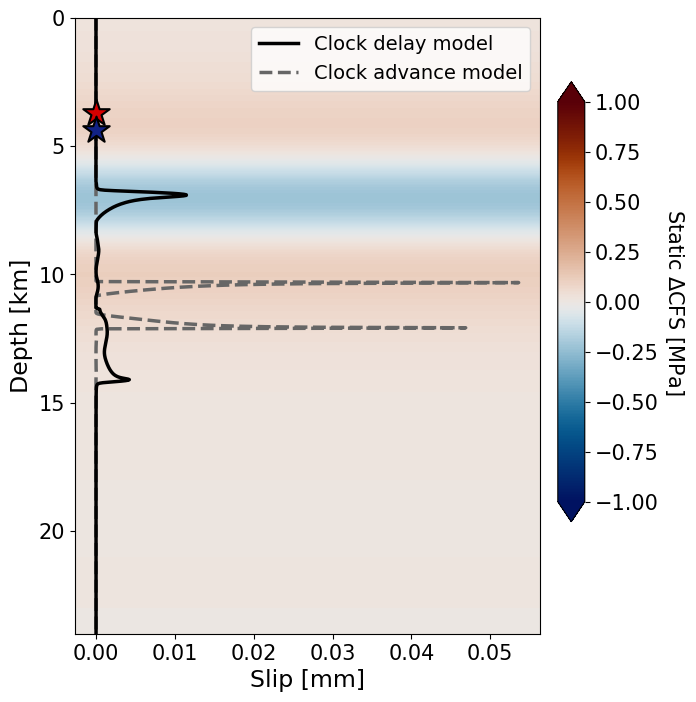

In [9]:
from cmcrameri import cm
lb=-1.; ub=1.

target_var = 'slip'
fig,ax=plt.subplots(figsize=(6,8))
var1 = model1.variables[target_var].data*1e3
var2 = model2.variables[target_var].data*1e3

delT = abs(model1.variables['shearT'].data[:,-1])-abs(model1.variables['shearT'].data[:,0])
delS = model1.variables['normalT'].data[:,-1]-model1.variables['normalT'].data[:,0]
dCFS = delT - 0.4*delS

# ax.plot(dCFS,-model1.dep,color='g',lw=2.5,label='$\Delta$CFS',zorder=3)
ax.plot(var1[:,-1]-var1[:,0],-model1.dep,color='k',lw=2.5,label='Clock delay model',zorder=3)
ax.plot(var2[:,-1]-var2[:,0],-model2.dep,color='0.4',linestyle='--',lw=2.5,label='Clock advance model')
ax.scatter(0,3.7,400,marker='*',fc=mp.myburgundy,ec='k',lw=1.5,zorder=3)
ax.scatter(0,4.38,400,marker='*',fc=mp.mynavy,ec='k',lw=1.5,zorder=3)
ax.legend(fontsize=14)
xl = ax.get_xlim()
x = np.array(xl)
# X,Y = np.meshgrid(x,model1.dep)
cb = ax.pcolormesh(x,-np.hstack(([0],model1.dep)),np.reshape(dCFS,(len(dCFS),1)),cmap=cm.vik,vmin=lb,vmax=ub)

cbaxes = fig.add_axes([0.93, 0.25, 0.045, 0.55])
plt.colorbar(cb,cax=cbaxes,extend='both').set_label('Static $\Delta$CFS [MPa]',fontsize=15,rotation=270,labelpad=20)
ax.set_xlabel('Slip [mm]',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
# ax.grid(True,alpha=0.5)
ax.set_xlim(xl)
ax.set_ylim(0,24)
ax.invert_yaxis()

In [ ]:
from cmcrameri import cm
lb=-1.; ub=1.
# model1 = routine.pert

target_var = 'slip'
fig,ax=plt.subplots(figsize=(6,8))
var1 = model1.variables[target_var].data*1e3

delT = abs(model1.variables['shearT'].data[:,-1])-abs(model1.variables['shearT'].data[:,0])
delS = model1.variables['normalT'].data[:,-1]-model1.variables['normalT'].data[:,0]
dCFS = delT - 0.4*delS

ax.plot(var1[:,-1]-var1[:,0],-model1.dep,color='k',lw=2.5,label='Clock delay model',zorder=3)
# ax.legend(fontsize=14)
xl = ax.get_xlim()
x = np.array(xl)
cb = ax.pcolormesh(x,-np.hstack(([0],model1.dep)),np.reshape(dCFS,(len(dCFS),1)),cmap='seismic',vmin=lb,vmax=ub)
# cb = ax.pcolormesh(x,-np.hstack(([0],model1.dep)),np.reshape(dCFS,(len(dCFS),1)),cmap=cm.vik,vmin=lb,vmax=ub)

cbaxes = fig.add_axes([0.93, 0.25, 0.045, 0.55])
plt.colorbar(cb,cax=cbaxes,extend='both').set_label('Static $\Delta$CFS [MPa]',fontsize=15,rotation=270,labelpad=20)
ax.set_xlabel('Slip [mm]',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
ax.set_xlim(xl)
ax.set_ylim(0,24)
ax.invert_yaxis()

In [ ]:
from cmcrameri import cm
lb=-1.; ub=1.
# model1 = routine.pert

target_var = 'slip'
fig,ax=plt.subplots(figsize=(6,8))

delT = abs(model1.variables['shearT'].data[:,-1])-abs(model1.variables['shearT'].data[:,0])
delS = model1.variables['normalT'].data[:,-1]-model1.variables['normalT'].data[:,0]
dCFS = delT - 0.4*delS

ax.plot(dCFS*1e3,-model1.dep,color='k',lw=2.5,zorder=3)

ax.set_xlabel('Static $\Delta$CFS [kPa]',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
ax.set_ylim(0,24)
ax.invert_yaxis()

# Check the last written output

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(15,10))
ivar = 3
# ax[0].plot(outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
# ax[0].plot(outputs3[:,1,ivar],-dep3,c=mp.myburgundy,lw=2.5,linestyle='--',label='First output after perturbation')
# ax[0].legend(fontsize=14)
ax[0].plot(outputs3[:,1,ivar]-outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
ax[0].set_xlabel('Shear Stress [MPa]',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,24)
ax[0].invert_yaxis()

ivar = 5
# ax[1].plot(outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
# ax[1].plot(outputs3[:,1,ivar],-dep3,c=mp.myburgundy,lw=2.5,linestyle='--',label='First output after perturbation')
# ax[1].legend(fontsize=14)
ax[1].plot(outputs3[:,1,ivar]-outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
ax[1].set_xlabel('Normal Stress [MPa]',fontsize=17)
ax[1].set_ylabel('Depth [km]',fontsize=17)
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,24)
ax[1].invert_yaxis()
plt.show()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(6,8))
target_var = 'state'
along_fault_at_transition(save_dir1,outputs1[:, outputs1.shape[1]-1,:],dep1,target_var,col='0.5',lab='output1; End',save_on=False)
along_fault_at_transition(save_dir2,outputs2[:,0,:],dep2,target_var,col=mp.mypink,lab='output2; Start',save_on=False)
along_fault_at_transition(save_dir2,outputs2[:, outputs2.shape[1]-1,:],dep2,target_var,col='0.62',lab='output2; End',save_on=False)
along_fault_at_transition(save_dir3,outputs3[:,0,:],dep3,target_var,col=mp.myblue,lab='output3; Start',save_on=False)
plt.legend(fontsize=15,loc='lower left')
plt.gca().invert_yaxis()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(6,8))
target_var = 'state'
indx1,indx2 = outputs1.shape[1]-1, 0
along_fault_at_transition(save_dir2,outputs2[:,0,:]-outputs1[:,outputs1.shape[1]-1,:],dep2,target_var,lab='output2 - output1',col=mp.myburgundy,save_on=False)
along_fault_at_transition(save_dir3,outputs3[:,0,:]-outputs2[:,outputs2.shape[1]-1,:],dep3,target_var,lab='output3 - output2',col=mp.mynavy,save_on=False)
plt.legend(fontsize=15,loc='lower left')
plt.gca().invert_yaxis()

In [ ]:
print('Outputs1: from %1.18e to %1.18e s'%(outputs1[0,0,0],outputs1[0,-1,0]))
print('Time at checkpoint 1: %1.18e s'%(ckp_dat1[-1][-1]))
print('Outputs2: from %1.18e to %1.18e s'%(outputs2[0,0,0],outputs2[0,-1,0]))
print('Time at checkpoint 2: %1.18e s'%(ckp_dat2[-1][-1]))
print('Outputs3: from %1.18e to %1.18e s'%(outputs3[0,0,0],outputs3[0,-1,0]))

# Plot τ/σ

In [ ]:
target_depth = evdep[idx]
indx = np.argmin(abs(abs(dep2) - abs(target_depth)))
print('Depth: %1.2f km'%(-dep2[indx]))
pure_Ts = np.array(outputs2[indx])[:,3]
pure_Pn = np.array(outputs2[indx])[:,5]
rel_time = np.array(outputs2[indx])[:,0] - np.array(outputs2[indx])[0,0]

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rel_time,-pure_Ts/pure_Pn,'k',lw=2.5)
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel(r'$\tau/\sigma$',fontsize=17)
plt.grid(True,alpha=0.5)
plt.ylim(0.3,0.8)
plt.show()

# Variable changes during perturbation


In [ ]:
def plot_along_depth(ax,var1,dep1,lab1,var2,dep2,lab2,tit,xlab):
    ax.plot(var1,dep1,color='k',lw=2,label=lab1)
    ax.plot(var2,dep2,color=mp.myburgundy,lw=2,label=lab2)
    xl = ax.get_xlim()
    ax.hlines(evdep1,xl[0],xl[1],color='0.62',lw=2,linestyle='--')
    ax.text(xl[1]-(xl[1]-xl[0])*0.01,evdep1,'%s Hyp.'%(lab1),color='0.62',ha='right',va='top',fontsize=13)
    ax.hlines(evdep2,xl[0],xl[1],color=mp.mypink,lw=2,linestyle='--')
    ax.text(xl[1]-(xl[1]-xl[0])*0.01,evdep2,'%s Hyp.'%(lab2),color=mp.mypink,ha='right',va='bottom',fontsize=13)
    ax.legend(fontsize=13)
    ax.set_title(tit,fontsize=17)
    ax.set_xlabel(xlab,fontsize=17)
    ax.set_ylabel('Depth [km]',fontsize=17)
    ax.set_xlim(xl)
    ax.set_ylim(0,24)
    ax.invert_yaxis()

## Slip

In [ ]:
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(6,8))
target_var = 'slip'
if not 'idx' in dir(model1):
    model1.load_related_ref()
    evdep1 = model1.evdep[model1.idx]
if not 'idx' in dir(model2):
    model2.load_related_ref()
    evdep2 = model2.evdep[model2.idx]
target_depth = model1.evdep[model1.idx]
var1 = model1.variables[target_var].data[:,-1] - model1.variables[target_var].data[:,1]
var2 = model2.variables[target_var].data[:,-1] - model2.variables[target_var].data[:,1]

plot_along_depth(ax,var1*1e3,-model1.dep,'Event 88',var2*1e3,-model2.dep,'Event 18','VSI, 340˚','Slip [mm]')
plt.show()


## State

In [ ]:
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(6,8))
target_var = 'state'
if not 'idx' in dir(model1):
    model1.load_related_ref()
    evdep1 = model1.evdep[model1.idx]
if not 'idx' in dir(model2):
    model2.load_related_ref()
    evdep2 = model2.evdep[model2.idx]
target_depth = model1.evdep[model1.idx]
var1 = model1.variables[target_var].data[:,-1] - model1.variables[target_var].data[:,1]
var2 = model2.variables[target_var].data[:,-1] - model2.variables[target_var].data[:,1]

plot_along_depth(ax,var1,-model1.dep,'Event 88',var2,-model2.dep,'Event 18','VSI, 340˚','State Variable Change (static)')
plt.show()


## Stresses

In [ ]:
plt.rcParams['font.size'] = '15'
fig,[ax1,ax2]=plt.subplots(ncols=2,figsize=(12,8))
if not 'idx' in dir(model1):
    model1.load_related_ref()
    evdep1 = model1.evdep[model1.idx]
if not 'idx' in dir(model2):
    model2.load_related_ref()
    evdep2 = model2.evdep[model2.idx]
target_depth = model1.evdep[model1.idx]

target_var = 'shearT'
var1 = model1.variables[target_var].data[:,-1] - model1.variables[target_var].data[:,1]
var2 = model2.variables[target_var].data[:,-1] - model2.variables[target_var].data[:,1]
plot_along_depth(ax1,-var1,-model1.dep,'Event 88',-var2,-model2.dep,'Event 18','VSI, 340˚','Shear Stress Change [MPa]')

target_var = 'normalT'
var1 = model1.variables[target_var].data[:,-1] - model1.variables[target_var].data[:,1]
var2 = model2.variables[target_var].data[:,-1] - model2.variables[target_var].data[:,1]
plot_along_depth(ax2,var1,-model1.dep,'Event 88',var2,-model2.dep,'Event 18','VSI, 340˚','Normal Stress Change [MPa]')

plt.show()


# Work

In [ ]:
from scipy import integrate
shearT = abs(model1.variables['shearT'].data)
cumslip = model1.variables['slip'].data[:,1:]

G,Dev = [],[]
for di in range(len(model1.dep)):
    target_depth = model1.dep[di]
    slip = cumslip[di,:] - cumslip[di,0]
    ts = -model1.get_output_dCFS(target_depth,print_on=False)[-1]

    x = slip[:400]
    y = ts[:400]*1e6
    area = integrate.simpson(y,x)
    G.append(area)
    Dev.append(x[-1]-x[0])

work = integrate.simpson(G,-model1.dep*1e3)
# print(work)

In [ ]:
if not 'idx' in dir(model1):
    model1.load_related_ref()
    hypo_depth = model1.evdep[model1.idx]
slip = cumslip[:,-1] - cumslip[:,0]
fig,ax=plt.subplots(ncols=2,figsize=(10,6))
ax[0].plot(slip,-model1.dep,'k')
xl = ax[0].get_xlim()
ax[0].hlines(y=hypo_depth,xmin=xl[0],xmax=xl[1],linestyle='--',color=mp.myburgundy)
ax[0].set_xlim(xl)
ax[0].set_xlabel('Slip [m]')
ax[0].set_ylabel('Depth [km]')
ax[0].set_ylim(0,12)
ax[0].invert_yaxis()

ax[1].plot(G,-model1.dep,'k')
xl = ax[1].get_xlim()
ax[1].hlines(y=hypo_depth,xmin=xl[0],xmax=xl[1],linestyle='--',color=mp.myburgundy)
ax[1].set_xlim(xl)
ax[1].set_xlabel('Work per distance [J/m]')
ax[1].set_ylim(0,12)
ax[1].invert_yaxis()
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(5,6))
# ax[0].plot(shearT[:,0],-model1.dep,'k')
# ax[0].plot(shearT[:,-1],-model1.dep,'r')
# ax.plot(shearT[:,-1]-shearT[:,0],-model1.dep,'k')
ax.plot(shearT[:,400]-shearT[:,0],-model1.dep,'k')
xl = ax.get_xlim()
ax.hlines(y=hypo_depth,xmin=xl[0],xmax=xl[1],linestyle='--',color=mp.myburgundy)
ax.set_xlim(xl)
ax.set_xlabel('Shear Traction [MPa]')
ax.set_ylabel('Depth [km]')
ax.set_ylim(0,24)
ax.invert_yaxis()
plt.show()

# Compare with the input stress perturbation

In [ ]:
delPn = np.loadtxt('%s/ssaf_%s_Pn_pert_mu%02d_%d.dat'%(pert.stress_models_dir,pert.seissol_model_n,int(pert.mu*10),pert.receivef_strike))
delTs = np.loadtxt('%s/ssaf_%s_Ts_pert_mu%02d_%d.dat'%(pert.stress_models_dir,pert.seissol_model_n,int(pert.mu*10),pert.receivef_strike))
depth_range = np.loadtxt('%s/ssaf_%s_dep_stress_pert_mu%02d_%d.dat'%(pert.stress_models_dir,pert.seissol_model_n,int(pert.mu*10),pert.receivef_strike))

In [ ]:
if not 'idx' in dir(model1):
    model1.load_related_ref()
    target_depth = model1.evdep[model1.idx]

## Compare with input normal stress/shear stress 

### Stress change

In [ ]:
from scipy import interpolate
# target_depth = 6.9
# target_depth = -model1.dep[np.argmax(cumslip[:,-1]-cumslip[:,0])]
if not 'idx' in dir(model1):
    model1.load_related_ref()
target_depth = model1.evdep[model1.idx]
_,time_seissol,delPn,delTs,depth_range = model1.get_input_dCFS(target_depth,dt=0.01)
_,time_tandem,pn,ts = model1.get_output_dCFS(target_depth)
delPn_at_D = np.array([interpolate.interp1d(depth_range,delPn[ti])(-target_depth) for ti in range(delPn.shape[0])])
delTs_at_D = [interpolate.interp1d(depth_range,delTs[ti])(-target_depth) for ti in range(delTs.shape[0])]
# t = np.linspace(0,delTs.shape[0]*0.01,delTs.shape[0])
aa=1
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
# plt.plot(time_seissol,delTs_at_D,'k',lw=2.5,label='Input Shear Stress')
# plt.plot(time_tandem,-ts,'0.62',lw=2.5,linestyle='--',label='Output Shear Stress')
plt.plot(time_seissol,-delPn_at_D,c=mp.myburgundy,lw=2.5,label='Input Normal Stress')
plt.plot(time_tandem,pn,c=mp.mypalepink,lw=2.5,linestyle='--',label='Output Normal Stress')
plt.legend(fontsize=15,loc='lower right')
plt.title('%s; Depth = %1.2f km; Strike = %d˚'%(model1.seissol_model_n,target_depth,model1.receivef_strike),fontsize=21,fontweight='bold')
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('Stress Change [MPa]',fontsize=17)
plt.grid(True,alpha=0.5)
# plt.xlim(0,6)
plt.show()

### Absolute stress level

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
# tdep,tvar = evdep[idx],'normalT'
tdep,tvar = evdep[idx],'shearT'
if tvar == 'normalT':
    delVar = delPn
elif tvar == 'shearT':
    delVar = delTs
# abs_on = False
abs_on = True
inc = 1e4
i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
fout_time(save_dir1,outputs1[:,i1,:],dep1,tdep,tvar,plot_in_sec=True,col='0.62',lab='Unperturbed',abs_on=abs_on,save_on=False)
otime,_ = stress_pert_at_depth(save_dir2,outputs2,dep2,delVar,depth_range,tdep,tvar,plot_in_sec=True,col='k',lab='Input perturbation',abs_on=abs_on,print_on=True,save_on=False)
fout_time(save_dir2,outputs2,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='Perturbed',abs_on=abs_on,save_on=False)
plt.legend(fontsize=15,loc='lower right')
plt.xlim(otime[0]-5,otime[-1]+5)
# plt.xlim(outputs2[0,0,0]-2.5,outputs2[0,-1,0]+2.5)
# plt.ylim(-36.9,-35)
# plt.ylim(35.25,36.5)
plt.show()


## Compute dCFS from the output to validate the behvaior

### During perturbation vs. input

In [ ]:
model1 = routine.pert

In [ ]:
from perturb_plots import compare_dCFS_at_depth
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(15,6))
if not 'idx' in dir(model1):
    model1.load_related_ref()
    target_depth = model1.evdep[model1.idx]
dCFSt_seissol,time_seissol = model1.get_input_dCFS(target_depth,dt=0.01)[:2]
dCFSt_tandem,time_tandem = model1.get_output_dCFS(target_depth)[:2]
ax = compare_dCFS_at_depth(ax,dCFSt_seissol,time_seissol,dCFSt_tandem,time_tandem)
ax.legend(fontsize=15,loc='lower right')
plt.show()

### After perturbation vs. During perturbation

In [ ]:
from scipy import interpolate
tdep = evdep[idx]
mu = 0.4
inc = 1e4

indx = np.argmin(abs(abs(dep2) - abs(tdep)))
print('Depth = %1.2f [km]'%abs(dep2[indx]))
pn2 = np.array(outputs2[indx])[1:,5]-np.array(outputs2[indx])[1,5]
ts2 = np.array(outputs2[indx])[1:,3]-np.array(outputs2[indx])[1,3]
dCFSt2 = -ts2 - mu*pn2
t2 = np.array(outputs2[indx])[1:,0] # -np.array(outputs2[indx])[0,0]

pn3 = np.array(outputs3[indx])[1:,5]-np.array(outputs2[indx])[1,5]
ts3 = np.array(outputs3[indx])[1:,3]-np.array(outputs2[indx])[1,3]
dCFSt3 = -ts3 - mu*pn3
t3 = np.array(outputs3[indx])[1:,0] # -np.array(outputs3[indx])[0,0]

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))

plt.plot(t2,dCFSt2,color='k',lw=2.5,label='DuringPerturbation',linestyle='-')
plt.plot(t3,dCFSt3,color=mp.myburgundy,lw=2.5,label='After Perturbation',linestyle='--')
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('dCFS [Mpa]',fontsize=17)
plt.grid(True,alpha=0.5)
plt.tight_layout()

plt.legend(fontsize=15,loc='lower right')
plt.xlim(outputs2[0,0,0]-.5,outputs3[0,0,0]+5)
plt.ylim(-1.5,1.5)
plt.show()


# Compare event distribution

In [ ]:
def plot_system_events(tstart,evdep,system_wide,col,lab=''):
    # plt.scatter(np.arange(len(system_wide)),evdep[system_wide],150,ec='k',fc=col,lw=1,marker='*',zorder=3,label=lab)
    plt.scatter(tstart[system_wide],evdep[system_wide],150,ec='k',fc=col,lw=1,marker='*',zorder=3,label=lab)
    xl = ax.get_xlim()
    plt.hlines(y=2,xmin=xl[0],xmax=xl[1],linestyles='--',color='0.62',lw=1.5)
    plt.hlines(y=12,xmin=xl[0],xmax=xl[1],linestyles='--',color='0.62',lw=1.5)
    plt.ylim(0,24)
    ax.invert_yaxis()
    plt.xticks(np.arange(len(system_wide)), minor=True)
    # plt.xlabel('System-size event index',fontsize=17)
    plt.xlabel('Event Time [s]',fontsize=17)
    plt.ylabel('Depth [km]',fontsize=17)
    plt.xlim(xl[0],xl[1])
    plt.grid(True,alpha=0.5,which='both')

def plot_all_events(tstart,evdep,system_wide,partial_rupture,lead_fs):
    plt.scatter(tstart[partial_rupture],evdep[partial_rupture],70,ec='k',fc=mp.mylightblue,lw=1,marker='d',zorder=3,label='Partial rupture events')
    plt.scatter(tstart[lead_fs],evdep[lead_fs],70,ec='k',fc=mp.mydarkviolet,lw=1,marker='d',zorder=3,label='Leading foreshocks')
    plt.scatter(tstart[system_wide],evdep[system_wide],150,ec='k',fc=mp.mydarkviolet,lw=1,marker='*',zorder=3,label='System-size events')
    # for k in range(len(tstart)):
    #     plt.text(tstart[k],evdep[k]-0.2,'%d'%(k),color='k',fontsize=13,ha='right',va='bottom')
    xl = ax.get_xlim()
    plt.hlines(y=2,xmin=0,xmax=xl[1],linestyles='--',color='0.62',lw=1.5)
    plt.hlines(y=12,xmin=0,xmax=xl[1],linestyles='--',color='0.62',lw=1.5)
    plt.ylim(0,24)
    ax.invert_yaxis()
    plt.xlabel('Event Time [s]',fontsize=17)
    plt.ylabel('Depth [km]',fontsize=17)
    plt.xlim(0,xl[1])
    # plt.xlim(xl)
    plt.grid(True,alpha=0.5,which='both')

In [ ]:
# System-size events only
ii = np.where(tstart[system_wide] <= max(tstart2))[0]
plot_system_events(tstart,evdep,system_wide[ii],mp.mydarkviolet)
plot_system_events(tstart2,evdep2,system_wide2,mp.myyellow,lab='$V_{pl} = 1$ mm/yr')
print('Vpl = 31 mm/yr: last event: %g s, total %d events'%(np.max(tstart[system_wide[ii]]),len(system_wide[ii])))
print('Vpl = 1 mm/yr: last event: %g s, total %d events'%(np.max(tstart2[system_wide2[ii]]),len(system_wide2)))
plt.legend(fontsize=13,loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# ref.load_events()
# model1.load_events(compute_on=True,save_on=False)
fig,ax=plt.subplots(figsize=(18,6))
plot_all_events(ref.tstart,ref.evdep,ref.system_wide,ref.partial_rupture,ref.lead_fs)
plt.vlines(x=model1.tstart[model1.system_wide],ymin=0,ymax=24,color=mp.myburgundy,linestyles='--',lw=2)
plt.legend(fontsize=13,loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
ref.load_events()
model1.load_events(compute_on=True,save_on=False)
ref.get_idx(model1.target_eventid)
# fig,ax=plt.subplots(figsize=(8,6))
# plot_all_events(ref.tstart,ref.evdep,ref.system_wide,ref.partial_rupture,ref.lead_fs)
# plt.vlines(x=ref.tstart[ref.idx]-16.2*3600,ymin=0,ymax=24,color=mp.mypink,linestyles='--',lw=2)
# plt.text(ref.tstart[ref.idx]-16.2*3600-1e4,15,'Perturbation Start',color=mp.mypink,fontsize=13,ha='right',va='bottom',fontweight='bold')
# plt.vlines(x=model1.tstart[model1.system_wide],ymin=0,ymax=24,color=mp.mynavy,linestyles='--',lw=2)
# plt.text(model1.tstart[model1.system_wide]-1e4,13.5,'Perturbed Event Time',color=mp.mynavy,fontsize=13,ha='right',va='bottom',fontweight='bold')
# # xmin,xmax = ref.tstart[12]-1e5,model1.tend[model1.system_wide[-1]]+1e5
# closest_leadfs = ref.lead_fs[np.argmin(ref.tstart[ref.lead_fs]-ref.tstart[ref.idx]-16.2*3600)]
# print(closest_leadfs)
# xmin,xmax = ref.tstart[closest_leadfs]-1e5,model.tend[model.system_wide[-1]]+1e5
# for k in range(len(ref.tstart)):
#     if ref.tstart[k] >= xmin and ref.tstart[k] <= xmax:
#         plt.text(ref.tstart[k],ref.evdep[k]-0.2,'%d'%(k),color='k',fontsize=13,ha='right',va='bottom')
# plt.legend(fontsize=13,loc='lower right')
# plt.xlim(xmin,xmax)
# plt.tight_layout()
# plt.show()

In [ ]:
(ref.tstart[18]-ref.tstart[12])/3600

In [ ]:
ref.lead_fs[np.argmin(abs(ref.tstart[ref.lead_fs]-ref.tstart[ref.idx]-16.2*3600))]
# np.argmin(abs(ref.tstart[ref.lead_fs]-ref.tstart[ref.idx]-16.2*3600))

# Quick summary chart

## Fixed event

## Fixed stress perturbation model

In [ ]:
from perturb_tools import PERTURB
import setup_shortcut
sc = setup_shortcut.setups()
import numpy as np

print('####### Fixed stress perturbation model #######')
model_n = 'vert_slow'
receivef_strike = 340
time_diff_in_h = 30
if time_diff_in_h == 16.2:
    full_model_name = '%s%d'%(sc.model_code(model_n),receivef_strike)
else:
    full_model_name = '%s%d_%dh'%(sc.model_code(model_n),receivef_strike,time_diff_in_h)
print('Model: %s'%(full_model_name))

event_list = [8,12,20,31,45,56]

evidx,org_evdep,new_evdep,trigg_response,peak_dyn,static = [],[],[],[],[],[]
for target_eventid in event_list:
    pert = PERTURB(target_eventid,model_n,receivef_strike,print_on=False)
    pert.events_without_pert(print_on=False)
    pert.events_with_pert(print_on=False)
    pert.load_stress_info(print_on=False)
    org_evdep.append(pert.ref_evdep[pert.ref_idx])
    evidx.append(pert.ref_idx)
    if len(pert.system_wide) == 1:
        new_evdep.append(pert.evdep[pert.system_wide][0])
        trigg_response.append((pert.tstart[pert.system_wide]-pert.ref_tstart[pert.ref_idx])/3600)
        peak_dyn.append(pert.peak_dynamic)
        static.append(pert.static)
    elif len(pert.system_wide) > 1:
        print('Event %d: More than one system-size events'%(target_eventid))
    elif len(pert.system_wide) == 0:
        print('Event %d: No system-size events'%(target_eventid))

print(' Event # | ID | Hyp. Depth | Peak dCFS | Static dCFS | Time diff. | New Hyp. Depth')
for i in range(len(org_evdep)):
    print('  %d  |  %d  |   %1.2f   |   %1.4f   |   %1.4f   |   %1.4f  |   %1.2f  '%(evidx[i],event_list[i],org_evdep[i],peak_dyn[i],static[i],trigg_response[i],new_evdep[i]))

In [ ]:
from perturb_tools import PERTURB
import setup_shortcut
sc = setup_shortcut.setups()
import numpy as np

print('####### Fixed stress perturbation model #######')
model_n = 'vert_slow'
receivef_strike = 340
time_diff_in_h = 30
if time_diff_in_h == 16.2:
    full_model_name = '%s%d'%(sc.model_code(model_n),receivef_strike)
else:
    full_model_name = '%s%d_%dh'%(sc.model_code(model_n),receivef_strike,time_diff_in_h)
print('Model: %s'%(full_model_name))

pert = PERTURB(8,model_n,receivef_strike,print_on=False)
pert.events_without_pert(print_on=False)
pert.load_stress_info(print_on=False)
print(pert.peak_dynamic,pert.static)

In [ ]:
float('vert_slow_X10'.split('_X')[-1])